# Sentiment Analysis

As part of the movie recommendation idea, we want the end user to have an additional data point for their consideration of our recommendation. 

We have therefore decided to employ a sentiment analysis, based on movie reviews. The sentiment analysis will be based on machine learning, employing different models, trained on a [sentiment-labelled IMDB movie review dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). As part of this, the movie reviews will be preprocessed, and vectorized, using TF-IDF. 
 

### Initial imports and data setup

In [7]:
import pandas as pd
import numpy as np
import nltk
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from bs4 import BeautifulSoup


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nojan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nojan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nojan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nojan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the data
df=pd.read_csv("training_data.csv") 

In [4]:
# Reviewing base characteristics of the data
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [6]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


The dataset contains 50K reviews, labeled positive/negative. Luckily, the dataset seems well-made as there are no missing values.

### Preprocessing
The next step is to do some preprocessing, to reduce number of features/dimensionality (I.E cleaning up the text and boiling it down to the bare minimum needed for the model)

In [9]:
reviews = []
reviews =[review for review in df['review']]

In [10]:
def simple_preprocess_text(corpus):
    # Remove HTML tags
    corpus = [BeautifulSoup(text, "html.parser").get_text() for text in corpus]
    # Remove urls
    corpus = [re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE) for text in corpus]
    # Remove non-alphabetic characters
    corpus = [re.sub("[^a-zA-Z]", " ", text) for text in corpus]
    # Convert to lowercase
    corpus = [text.lower() for text in corpus]
    return corpus

def preprocessing_lemmatization(corpus):
    # Tokenize the text (split it into words)
    corpus = [word_tokenize(text) for text in corpus]
    # Remove stop words (The, a, on, etc)
    stop_words = set(stopwords.words("english"))
    corpus = [[word for word in text if word not in stop_words] for text in corpus]
    # Lemmatization,
    # AKA remove word endings to get the base form
    lemmatizer = nltk.stem.WordNetLemmatizer()
    corpus = [[lemmatizer.lemmatize(word) for word in text] for text in corpus]
    # Join the words back into one string
    corpus = [" ".join(text) for text in corpus]
    return corpus


In [11]:
# EXAMPLE of pre-processing some text
sample_text = ["<p>It's a great movie. I love it! <a href='http://www.google.com'>Google</a></p>"]
print(sample_text)

test= simple_preprocess_text(sample_text)
print(test)
test= preprocessing_lemmatization(test)

print(test)

["<p>It's a great movie. I love it! <a href='http://www.google.com'>Google</a></p>"]
['it s a great movie  i love it  google']
['great movie love google']


In [12]:
processed_text= simple_preprocess_text(reviews)
processed_text= preprocessing_lemmatization(processed_text)


C:\Users\nojan\AppData\Local\Temp\ipykernel_14404\623102517.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  corpus = [BeautifulSoup(text, "html.parser").get_text() for text in corpus]


As shown, the text is now cleaned up, and only the most important words for the sentiment analysis is kept

The next step is to use TF-IDF to extract the most important features from the text. TF stands for term frequency, the frequency of a word appearing in a document. IDF stands for Inverse Document Frequency, which is a weighing method that indicate how commonly a word appears across all the documents, which in our case are the reviews. 

In [13]:
# TF-IDF vectorization,
# which is a way to represent text data as a matrix of numbers
vector = TfidfVectorizer(max_features=5000)
X = vector.fit_transform(processed_text).toarray()
# We will include the sentiment column as the target variable
y = df['sentiment'].values

In [14]:
# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# The random_state parameter is used to ensure that the data is split in the same way every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will now be training and testing on different model types, to evaluate which one is best for our purposes

In [15]:
models = {}

In [16]:
# Train a logistic regression model
models['Logistic Regression'] = LogisticRegression()
models['Logistic Regression'].fit(X_train, y_train)

LogisticRegression()

In [17]:
# Train a SVM model
from sklearn.svm import LinearSVC
models['SVM'] = LinearSVC() # faster converge, if linear
models['SVM'].fit(X_train, y_train)

c:\Users\nojan\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [18]:
# Train a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()
models['Naive Bayes'].fit(X_train, y_train)

GaussianNB()

In [19]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_jobs=-1)
models['Random Forest'].fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [21]:
best_model = None
best_accuracy = 0
for model in models:
    y_pred = models[model].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model}")
    print(f"Accuracy of sentiment prediction: {accuracy}")
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"The best model is: {best_model}")


Model: Logistic Regression
Accuracy of sentiment prediction: 0.8878

Model: SVM
Accuracy of sentiment prediction: 0.8828

Model: Naive Bayes
Accuracy of sentiment prediction: 0.7965

Model: Random Forest
Accuracy of sentiment prediction: 0.8486

The best model is: Logistic Regression


The results show that the Logistic Regression performs the best on this dataset.
This is the model we will continue with, when we now apply the trained model on our own scrapped movie dataset.
Each movie has 25 reviews attached

In [37]:
import pickle 
with open('reviews.pkl', 'rb') as file:
    custom_data = pd.read_pickle(file)



In [38]:
custom_data = pd.DataFrame.from_dict(custom_data)

In [ ]:
sentiments = {}
bad_data = []
for title in custom_data:
    temp = list(custom_data[title])
    if temp[0] is None:
        bad_data.append(title)
        continue
    temp= simple_preprocess_text(temp)
    temp= preprocessing_lemmatization(temp)
    temp = vector.transform(temp).toarray()
    sentiment = models[best_model].predict(temp)
    sentiments[title] = sentiment

In [40]:
len(bad_data)

315

In [ ]:
sentiment_scores = {}
for title in sentiments:
    temp = sentiments[title]
    temp_score = (np.count_nonzero(temp == "positive"))
    sentiment_scores[title] = temp_score/len(temp)

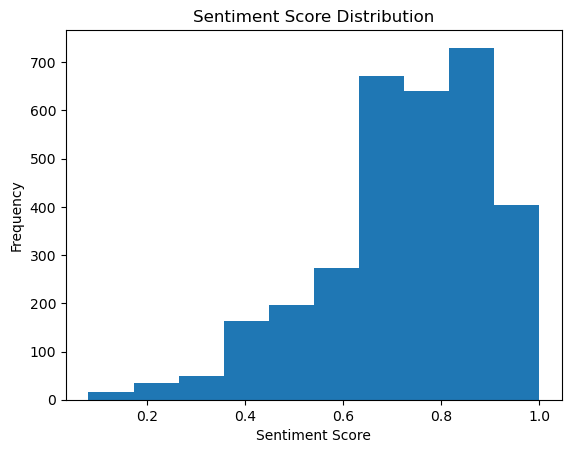

In [50]:
# histogram of sentiment scores
import matplotlib.pyplot as plt
plt.hist(sentiment_scores.values(), bins=10)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()
